In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection   import train_test_split
from sklearn.preprocessing     import MinMaxScaler
from sklearn.metrics           import r2_score , mean_squared_error
from sklearn.linear_model      import LinearRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

##  Reading the data

In [2]:
bike = pd.read_csv('day (1).csv')

In [3]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike.shape

(730, 16)

In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Cleaning

- Dropping the columns that are not useful
  - Drooping the instant column as it is Equivalent to index column
  - Dropping dteday as yr and mnth covering the same
  - Dropping casual and registered columns because cnt is sum of casual and registered

In [7]:
bike.drop(['instant'], axis= 1 ,inplace= True)

In [8]:
bike.drop(['dteday'], axis= 1 ,inplace= True)
bike.drop(['casual'], axis= 1 ,inplace= True)
bike.drop(['registered'], axis= 1 ,inplace= True)

In [9]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [10]:
bike.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.272230e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.272230e-16,1.000000e+00,-5.149955e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.149955e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


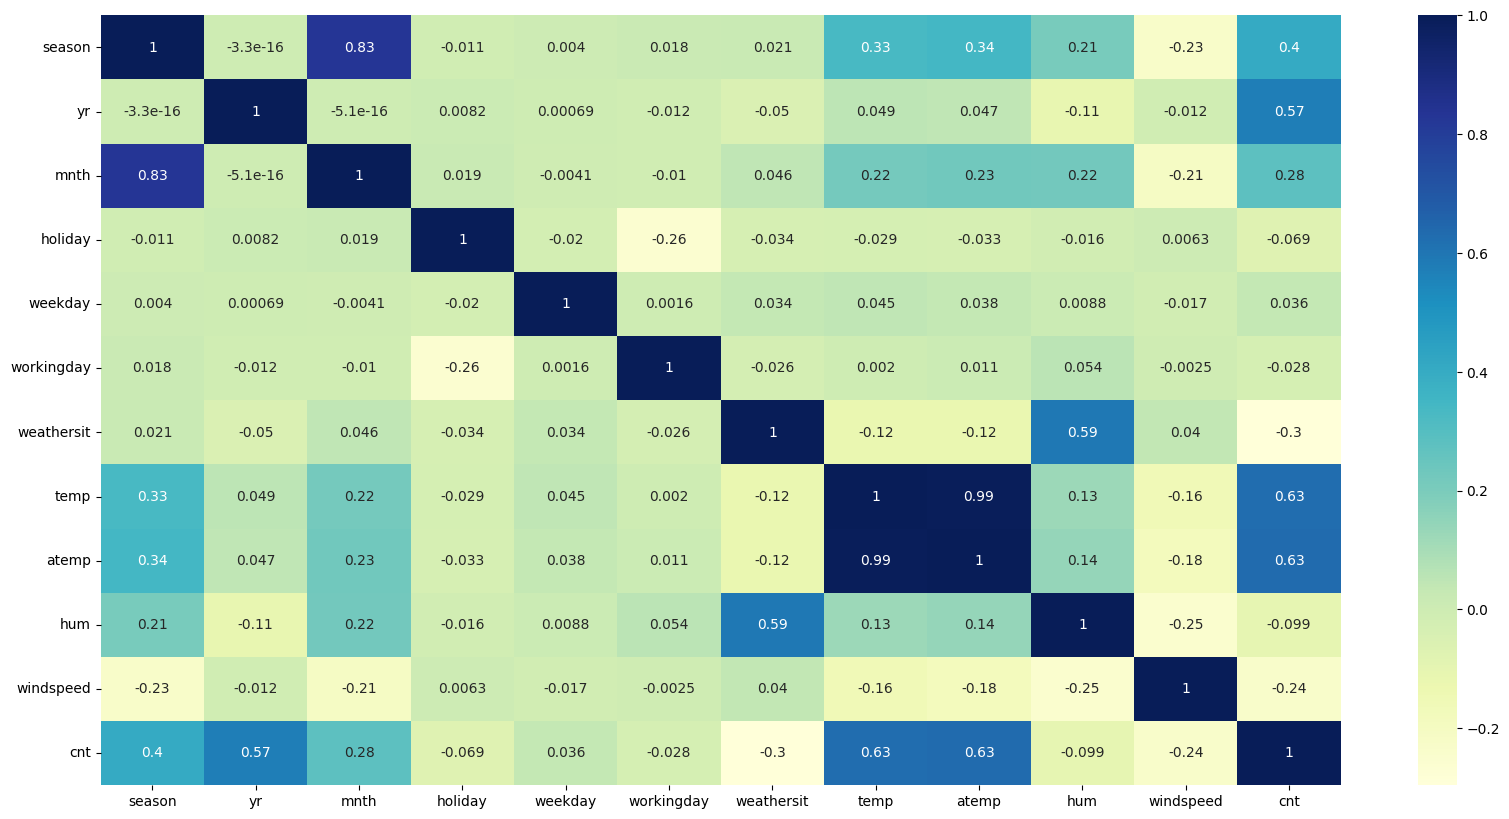

In [11]:
plt.figure(figsize= (20,10))
sns.heatmap(bike.corr(),cmap = 'YlGnBu',annot=True)
plt.show()

- we should change the non numerical to numerical variables which are season, month and weekend

### Checking for outliers

In [12]:
bike.nunique() 

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

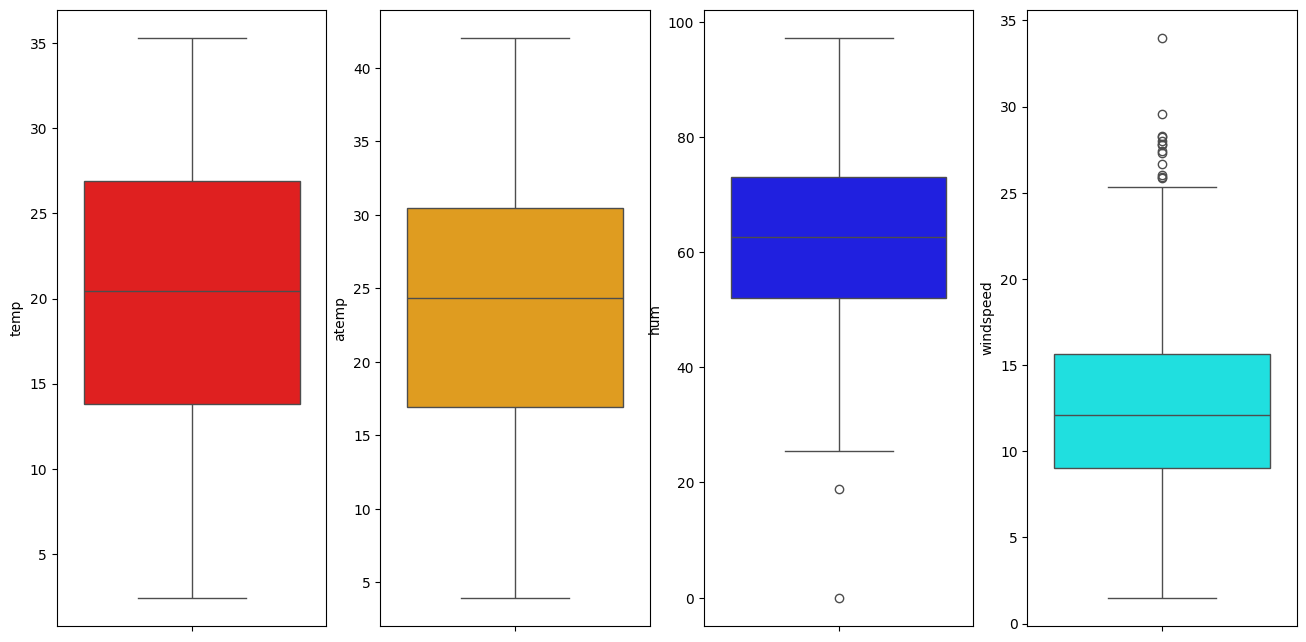

In [13]:
# as the values of temp, atemp,hum,windspeed are high we are going to check outliers for these columns
plt.figure(figsize= (16,8))
plt.subplot(1,4,1)
sns.boxplot( bike['temp'],color= 'red' )


plt.subplot(1,4,2)
sns.boxplot( bike['atemp'] ,color= 'orange')

plt.subplot(1,4,3)
sns.boxplot( bike['hum'] ,color= 'blue' )

plt.subplot(1,4,4)
sns.boxplot( bike['windspeed'], color= 'cyan' )

plt.show()

- From the above boxplots it is clear that there are no outliers

In [14]:
# changing the categorical variables from numerical to string as mentioned in data dictonary
bike.season=bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
bike.mnth = bike.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'jun',7:'jul',8:'aug',9:'sept',10:'oct',11:'nov',12: 'dec'})
bike.weekday = bike.weekday.map({1:'mon', 2: 'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat', 0:'sun'})
bike.weathersit = bike.weathersit.map({1: 'Clear',2: 'Mist ',3: 'Light Snow',4: 'Heavy Rain'})


In [16]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualisation

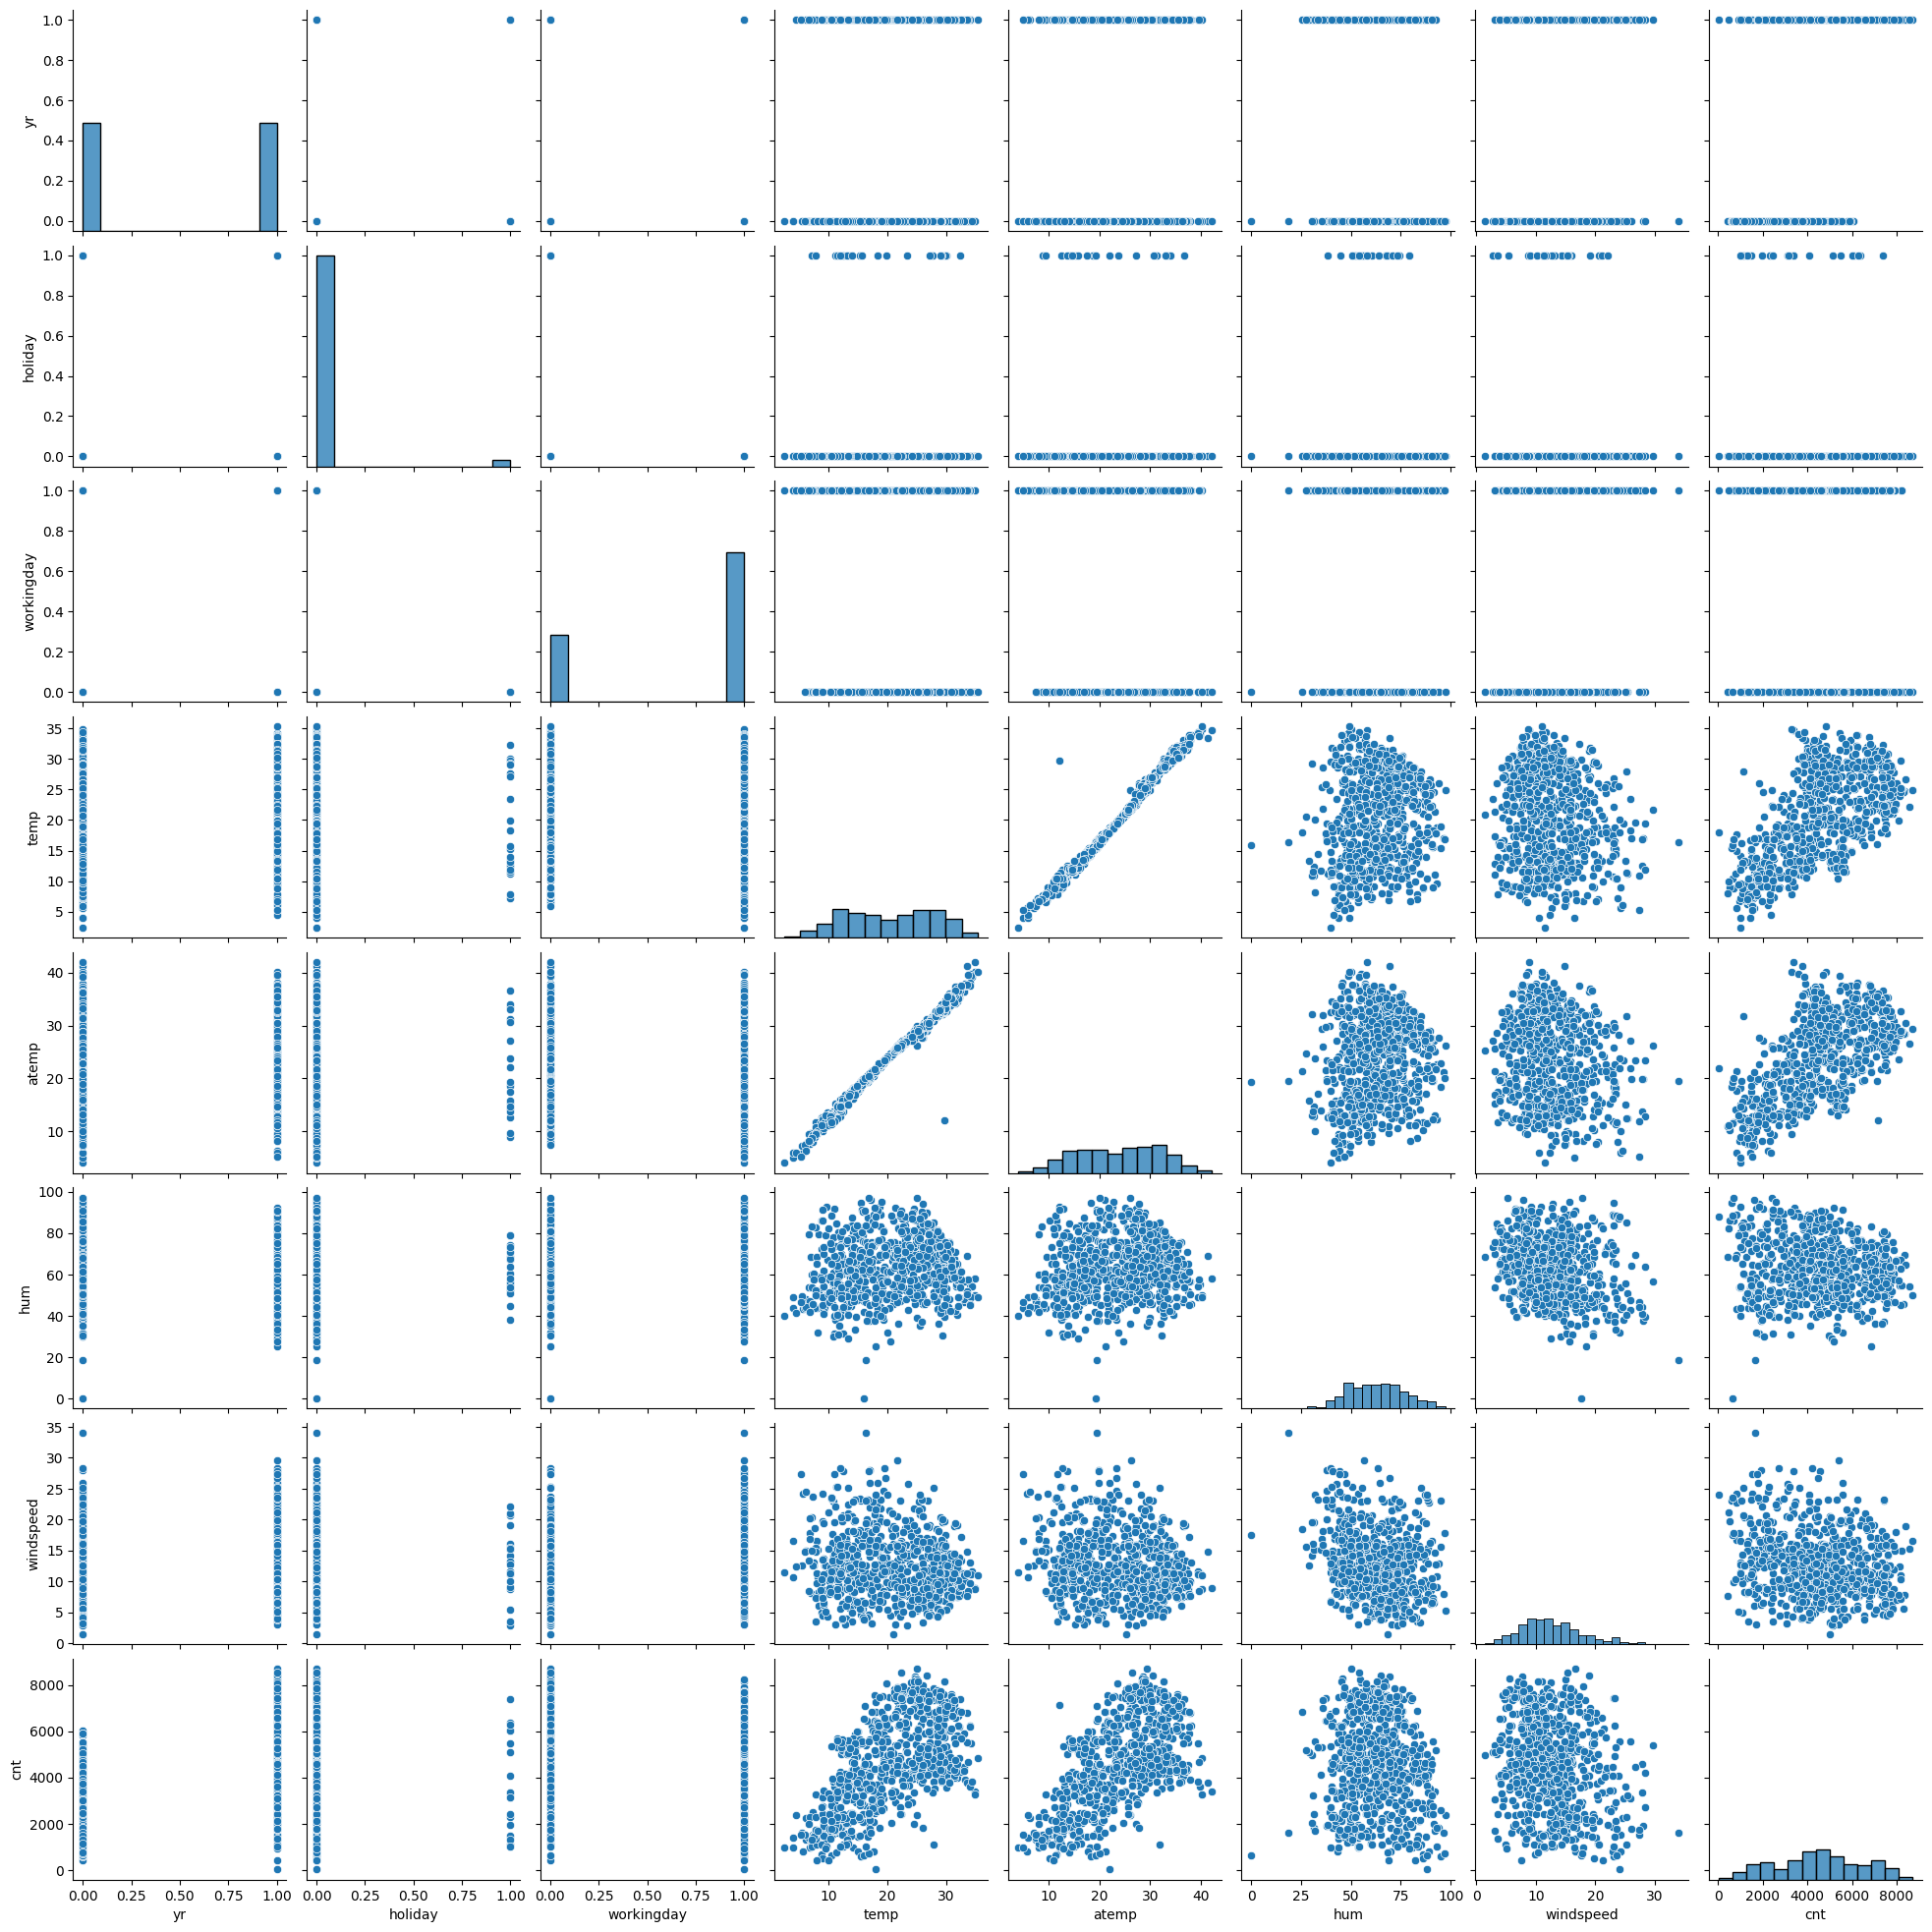

In [17]:
sns.pairplot(bike)
plt.show()

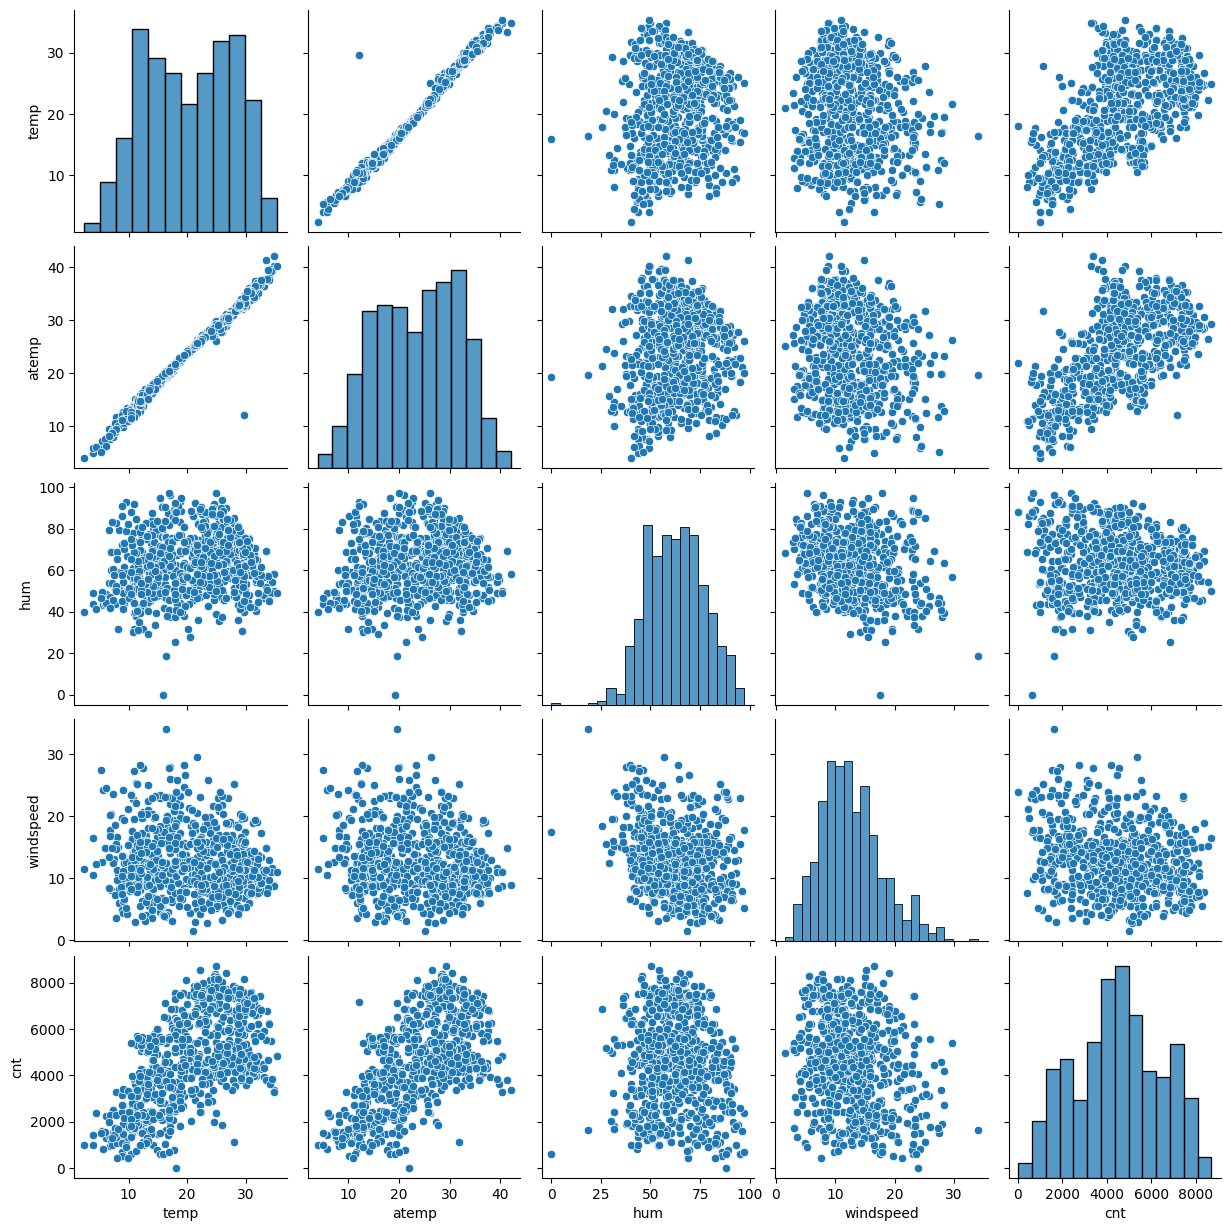

In [18]:
# checking for linear relationship between numerical variables

sns.pairplot(data = bike , vars = ['temp','atemp','hum','windspeed','cnt'] )
plt.show()

- From the above pairplots we can say that temp and atemp are highly correlated and show linear relationship

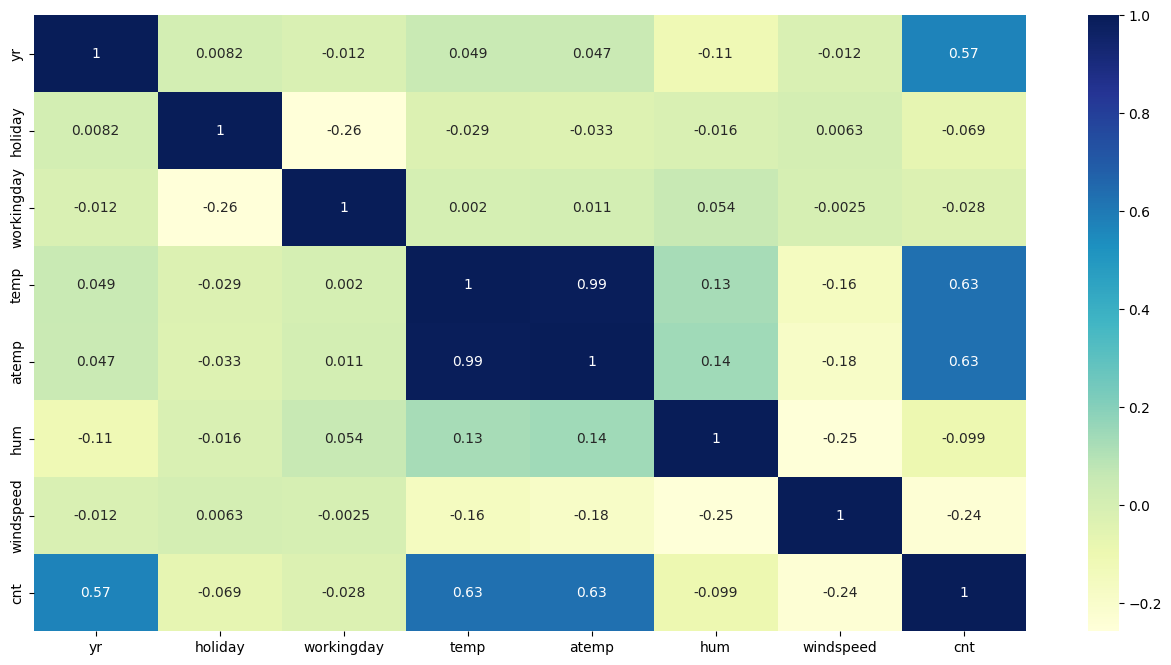

In [19]:
# heatmap for numerical variables
plt.figure(figsize= (16,8))
sns.heatmap(bike.corr(),cmap = 'YlGnBu',annot=True)
plt.show()

## Data Visualisation 

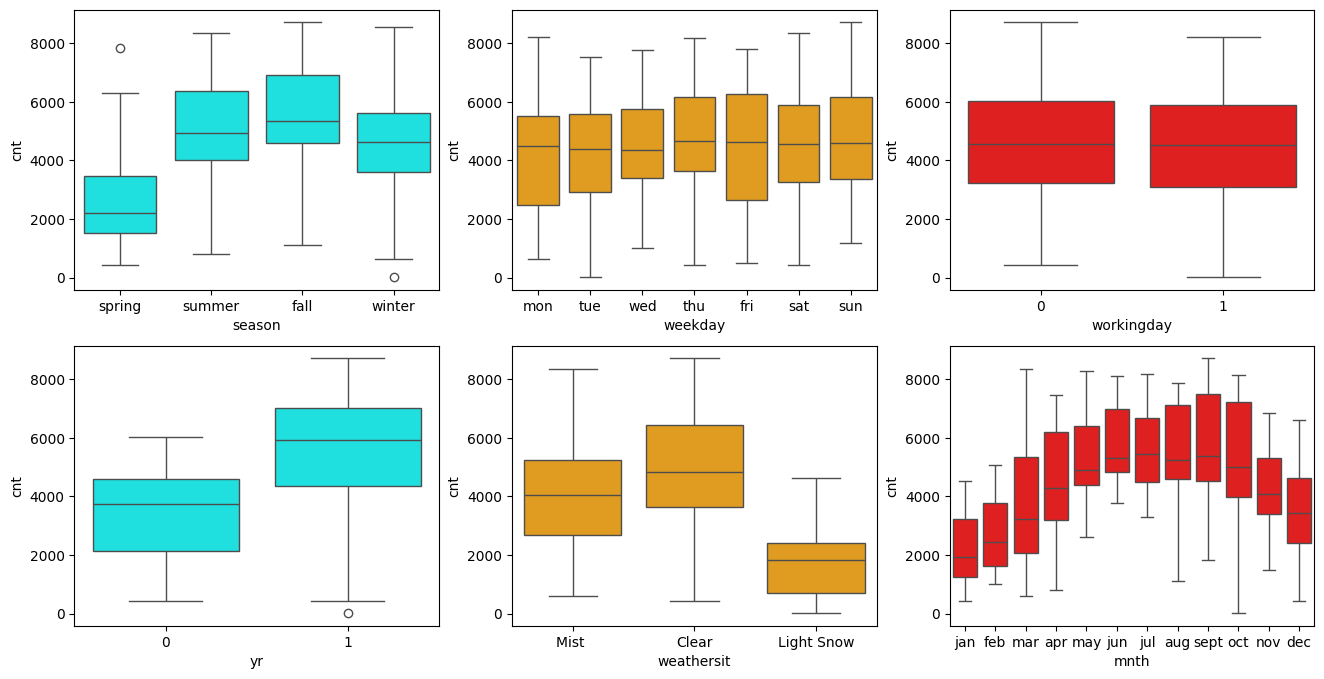

In [20]:
# visulaisation for categorical variables
plt.figure(figsize=(16,8))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike, color= 'cyan')

plt.subplot(2,3,2)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike, color= 'orange')

plt.subplot(2,3,3)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike, color= 'red')

plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = bike, color= 'cyan')

plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike, color= 'orange')

plt.subplot(2,3,6)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike, color= 'red')

plt.show()

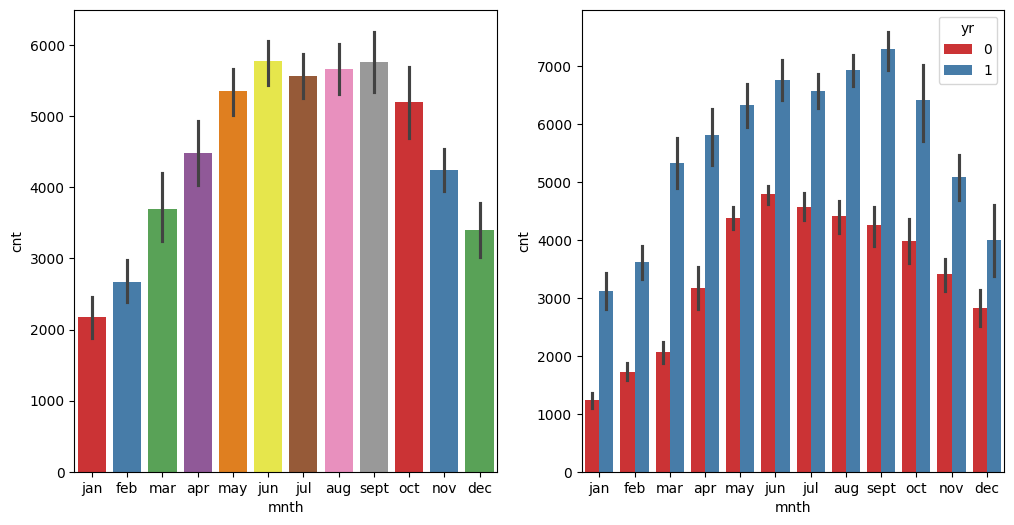

In [33]:
# create barplot related to categorical columns
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data =bike,palette='Set1')
plt.subplot(1,2,2)
sns.barplot(x = 'mnth', y = 'cnt',hue='yr',data=bike,palette='Set1')
plt.show()

- The months of June, September, and August typically experience the highest booking rates. Observing the trend on the bar plot, it's evident that bookings show an upward trend at the beginning of the year, peaking around June, September, and August, and then gradually decreasing from October onwards. Additionally, there was an overall increase in bookings from 2018 to 2019.

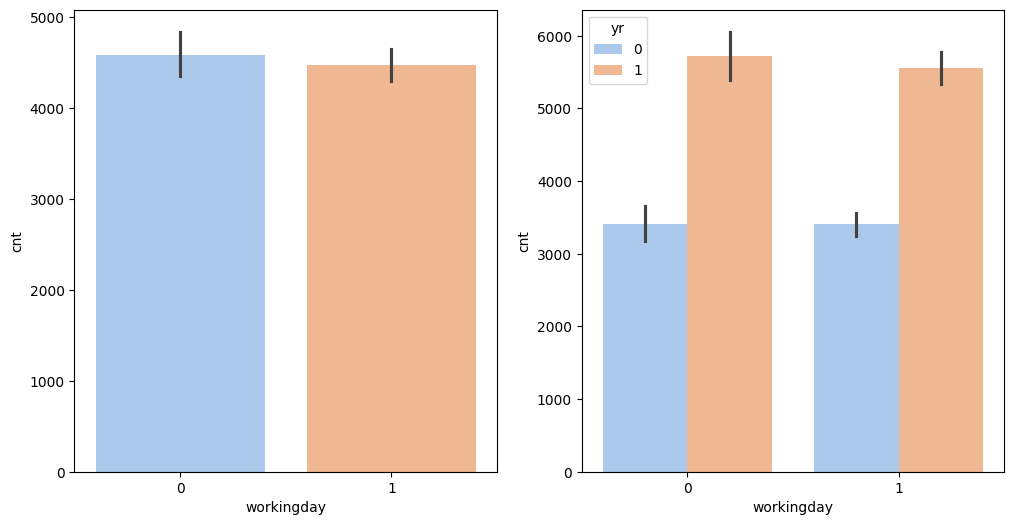

In [28]:
# workingday
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- There doesn't appear to be a significant difference in the increase or decrease of bookings based on whether it's a working day or not. However, there was an overall increase in bookings from 2018 to 2019.

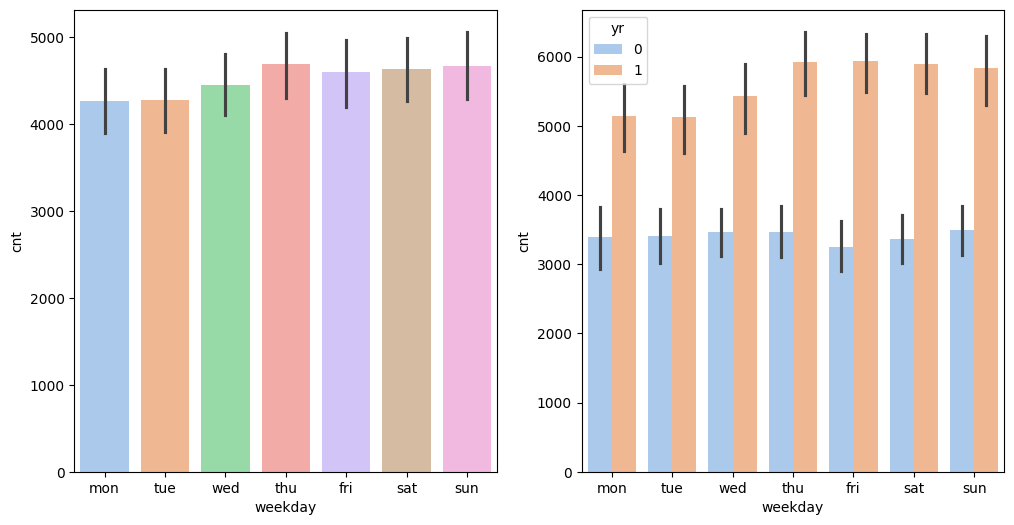

In [29]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- It appears that Friday,Saturday,Sunday and Thursday tend to have higher booking rates compared to other days of the week. Additionally, there was an overall increase in bookings from 2018 to 2019.

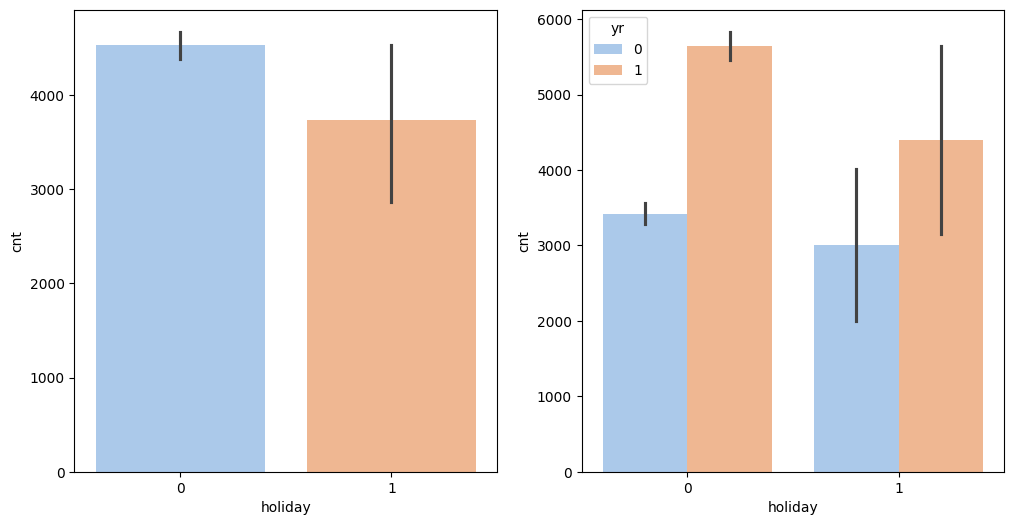

In [30]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='holiday',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- Bookings appear to be higher when it is not a holiday. Additionally, there was an overall increase in bookings from 2018 to 2019.

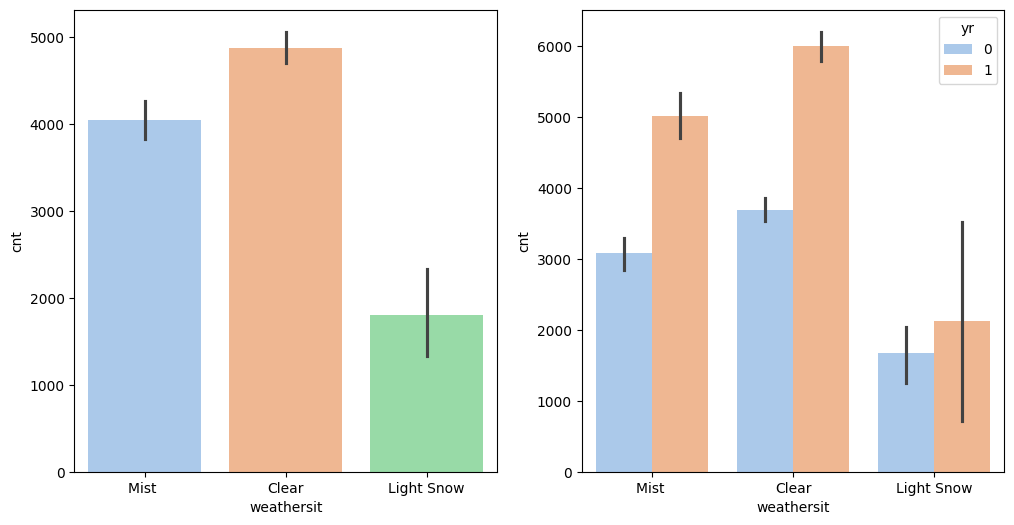

In [27]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- There appears to be a higher number of bookings on clear weather days compared to other weather conditions.

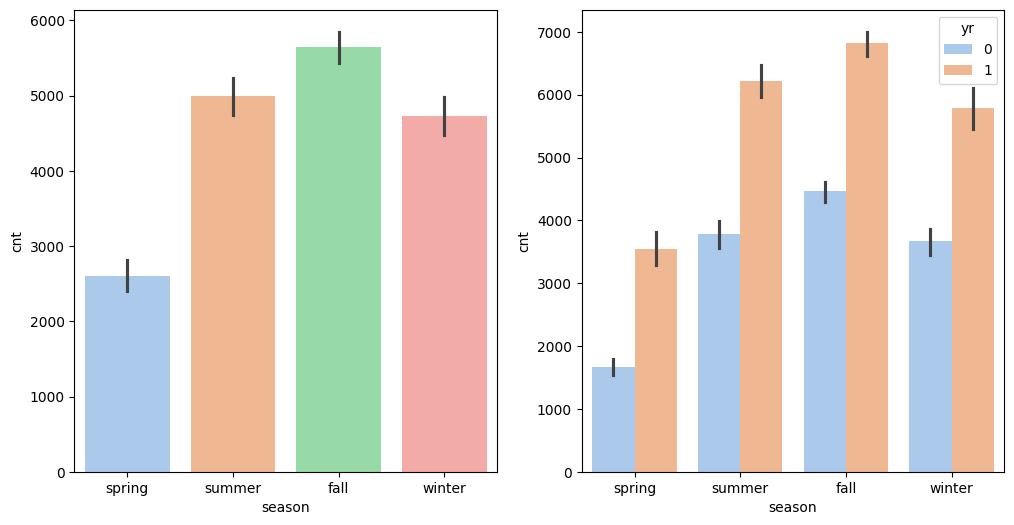

In [31]:
# season
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'season', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- Fall season typically sees higher bookings compared to other seasons, and there was an increase in bookings from 2018 to 2019.

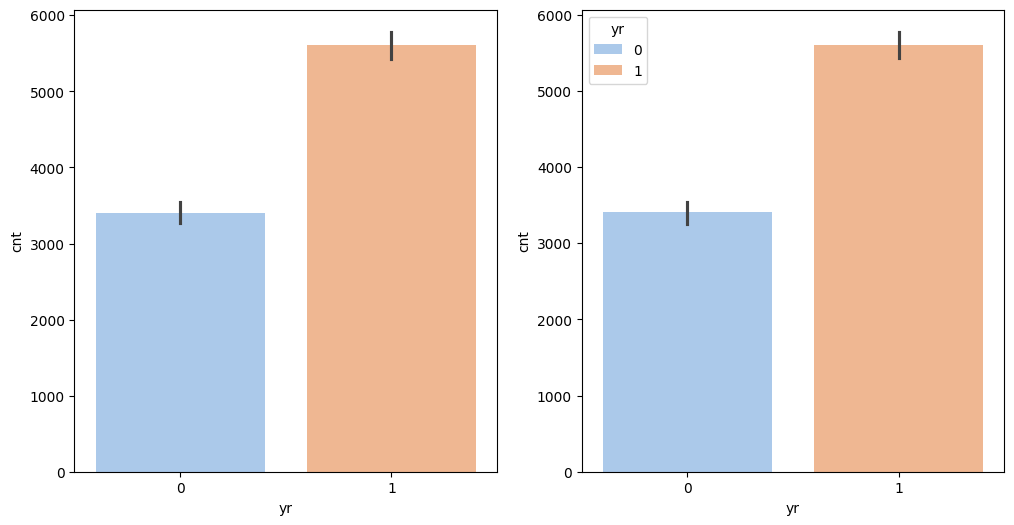

In [32]:
plt.figure(figsize= (12,6))
plt.subplot(1,2,1)
sns.barplot(x='yr',y='cnt',data =bike,palette="pastel")
plt.subplot(1,2,2)
sns.barplot(x = 'yr', y = 'cnt',hue='yr',data=bike,palette="pastel")
plt.show()

- 2019 seems to have more bookings than 2018.

## Correlation between Numerical Variables

In [34]:
num_predictors = ["temp","atemp","hum","windspeed","cnt"]

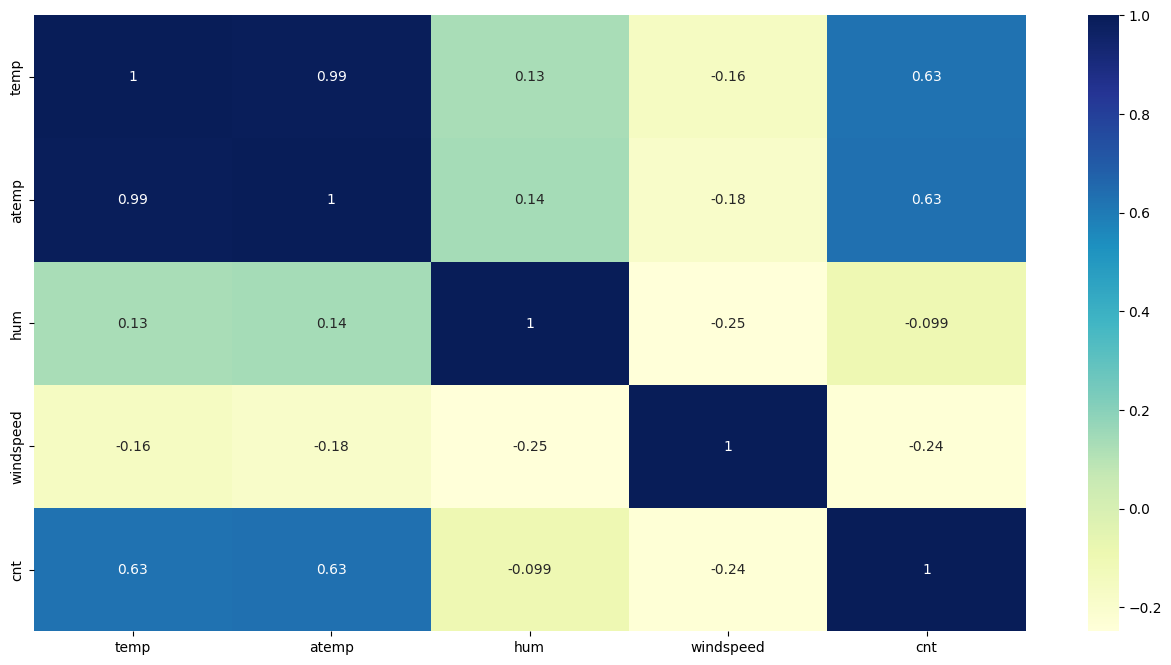

In [35]:
plt.figure(figsize=(16,8))
sns.heatmap(bike[num_predictors].corr(),cmap = 'YlGnBu',annot =True)
plt.show()

In [36]:
bike.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


##  Data Preparation

- Creating dummies for categorical variables

In [37]:
bike = pd.get_dummies(data = bike , columns= ['season','mnth','weekday','weathersit'],drop_first= True)

In [38]:
bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Test-Train data split

In [39]:
# splitting into train and test data set
df_train,df_test = train_test_split(bike,train_size = 0.7,test_size= 0.3,random_state = 100)


In [40]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,1,0,0,0,0,1


In [41]:
df_train.shape

(510, 30)

In [42]:
df_test.shape

(219, 30)

In [43]:
#scaling continuous varibles
cont_vars = ['temp','atemp','hum','windspeed','cnt']

scalar = MinMaxScaler()

df_train[cont_vars]= scalar.fit_transform(df_train[cont_vars])

In [44]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


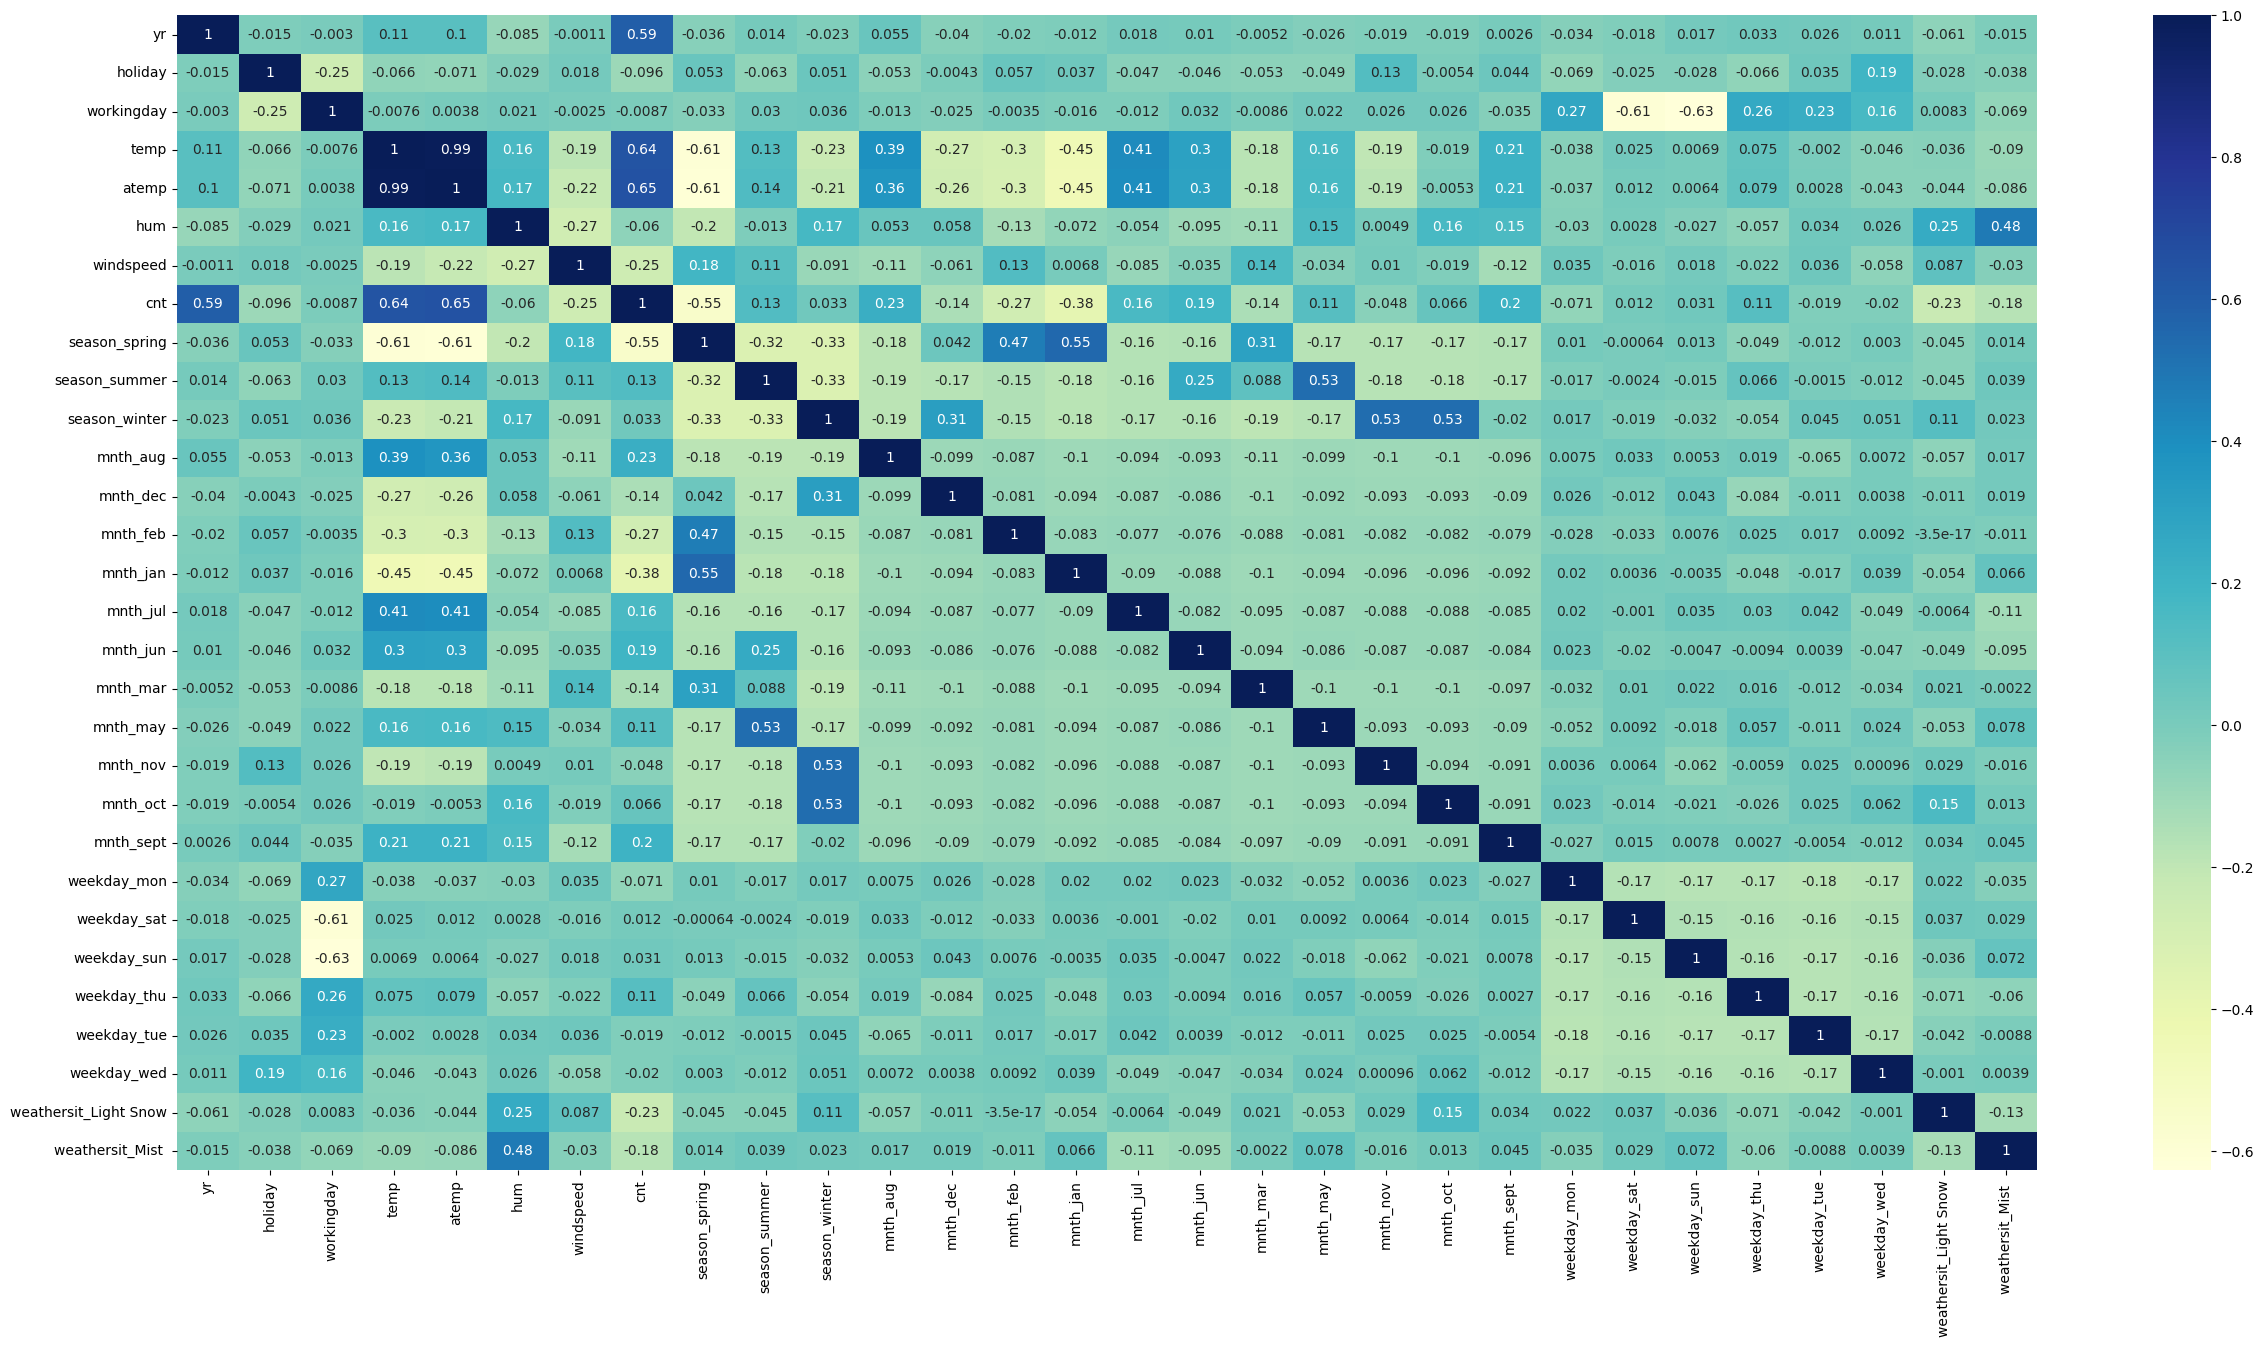

In [45]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize=(30,15))
sns.heatmap(df_train.corr(),cmap = 'YlGnBu',annot=True)
plt.show()

- The cnt appears to correlate with the yr variable and temp, while misty weather and hum exhibit a similar correlation. Additionally, there is a notable correlation between the spring season and the months of January and February, the summer season and the month of May, and the winter season and the months of October and November.

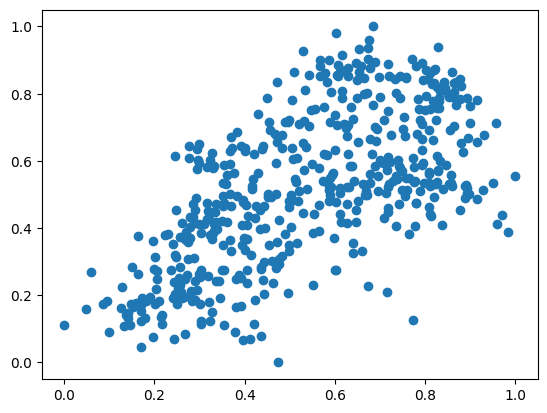

In [46]:
# visualising temp and cnt as they are correlated
plt.scatter(x=df_train.temp ,y=df_train.cnt )

plt.show()

- Above scatter plot shows a positive correlation between temp and cnt

## Splitting X and y variables form df_train

In [47]:
y_df_train = df_train.pop('cnt')
X_df_train = df_train

In [48]:
y_df_train.shape

(510,)

## Building model using RFE

In [49]:
lr = LinearRegression()
lr.fit(X_df_train,y_df_train)

LinearRegression()

In [50]:
# Running RFE with the output number of the variable equal to 15
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_df_train, y_df_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [51]:
list(zip(X_df_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', False, 4),
 ('weekday_sun', False, 5),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 11),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist ', True, 1)]

In [52]:
#columns that are selected by the RFE
col = X_df_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist '],
      dtype='object')

In [53]:
# columns that are not selected by RFE
X_df_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_aug', 'mnth_feb', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [54]:
# creating a function for building the model
def models(cols):
    X_df_train_sm = sm.add_constant(X_df_train[cols])
    lm = sm.OLS(y_df_train,X_df_train_sm).fit()
    print(lm.summary())
    return lm

In [55]:
# creating a function for VIF
def vif(cols):
    df_train_1 = X_df_train[cols]
    vif = pd.DataFrame()
    vif['Features']= df_train_1.columns
    vif['VIF'] = [variance_inflation_factor(df_train_1.values,i) for i in range(df_train_1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF',ascending = False))

In [56]:
# taking all the columns suppourted by RFE
col = ['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

## Model - 1

In [57]:
lm_1 = models(col)
lm_1

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.34e-189
Time:                        11:36:02   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.32

In [58]:
vif(col)

                 Features    VIF
3                     hum  30.94
2                    temp  17.80
4               windspeed   4.72
5           season_spring   4.37
7           season_winter   4.06
6           season_summer   2.81
14       weathersit_Mist    2.32
0                      yr   2.09
11               mnth_nov   1.83
9                mnth_jan   1.75
10               mnth_jul   1.59
8                mnth_dec   1.55
12              mnth_sept   1.41
13  weathersit_Light Snow   1.28
1                 holiday   1.06


In [59]:
# Check the parameters obtained
lm_1.params

const                    0.320243
yr                       0.230328
holiday                 -0.091228
temp                     0.479977
hum                     -0.160227
windspeed               -0.188457
season_spring           -0.061737
season_summer            0.040767
season_winter            0.103435
mnth_dec                -0.037199
mnth_jan                -0.043748
mnth_jul                -0.055495
mnth_nov                -0.040949
mnth_sept                0.074891
weathersit_Light Snow   -0.248116
weathersit_Mist         -0.055876
dtype: float64

## Model - 2

In [60]:
# variable hum shows high vif so we can drop it
col2 = ['yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
       'mnth_nov', 'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

In [61]:
lm_2=models(col2)
lm_2

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.57e-186
Time:                        11:36:05   Log-Likelihood:                 505.61
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.24

In [62]:
vif(col2)

                 Features   VIF
2                    temp  5.17
3               windspeed  4.67
6           season_winter  2.94
4           season_spring  2.89
5           season_summer  2.23
0                      yr  2.07
10               mnth_nov  1.80
8                mnth_jan  1.66
9                mnth_jul  1.59
13       weathersit_Mist   1.56
7                mnth_dec  1.46
11              mnth_sept  1.35
12  weathersit_Light Snow  1.09
1                 holiday  1.06


In [63]:
# Check the parameters obtained
lm_2.params

const                    0.246635
yr                       0.234287
holiday                 -0.091915
temp                     0.437655
windspeed               -0.158596
season_spring           -0.071640
season_summer            0.033271
season_winter            0.088652
mnth_dec                -0.044529
mnth_jan                -0.050270
mnth_jul                -0.050376
mnth_nov                -0.041852
mnth_sept                0.068219
weathersit_Light Snow   -0.292892
weathersit_Mist         -0.081442
dtype: float64

## Model-3

In [64]:
#lets drop mnth_nov as it exhibits high p-value
col3 = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_dec', 'mnth_jan', 'mnth_jul',
        'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

In [65]:
lm_3=models(col3)
lm_3

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.8
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.20e-186
Time:                        11:36:07   Log-Likelihood:                 503.13
No. Observations:                 510   AIC:                            -978.3
Df Residuals:                     496   BIC:                            -919.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

In [66]:
vif(col3)

                 Features   VIF
2                    temp  5.14
3               windspeed  4.62
4           season_spring  2.89
5           season_summer  2.23
0                      yr  2.07
6           season_winter  2.06
8                mnth_jan  1.65
9                mnth_jul  1.59
12       weathersit_Mist   1.56
10              mnth_sept  1.34
7                mnth_dec  1.29
11  weathersit_Light Snow  1.08
1                 holiday  1.04


In [67]:
# Check the parameters obtained
lm_3.params

const                    0.228849
yr                       0.234164
holiday                 -0.098779
temp                     0.458239
windspeed               -0.159533
season_spring           -0.063065
season_summer            0.039079
season_winter            0.078828
mnth_dec                -0.029254
mnth_jan                -0.045112
mnth_jul                -0.050229
mnth_sept                0.073969
weathersit_Light Snow   -0.288834
weathersit_Mist         -0.080694
dtype: float64

## Model- 4

In [68]:
# lets drop mnth_dec as it shows high p-value

col4 = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul',
        'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

In [69]:
lm_4 = models(col4)
lm_4

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     213.1
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          3.97e-187
Time:                        11:36:09   Log-Likelihood:                 501.48
No. Observations:                 510   AIC:                            -977.0
Df Residuals:                     497   BIC:                            -921.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.21

In [70]:
vif(col4)

                 Features   VIF
2                    temp  5.13
3               windspeed  4.61
4           season_spring  2.75
5           season_summer  2.22
0                      yr  2.07
6           season_winter  1.79
7                mnth_jan  1.61
8                mnth_jul  1.59
11       weathersit_Mist   1.56
9               mnth_sept  1.34
10  weathersit_Light Snow  1.08
1                 holiday  1.04


In [71]:
# Check the parameters obtained
lm_4.params

const                    0.215488
yr                       0.234197
holiday                 -0.097317
temp                     0.472772
windspeed               -0.154925
season_spring           -0.061504
season_summer            0.042205
season_winter            0.077050
mnth_jan                -0.037996
mnth_jul                -0.050722
mnth_sept                0.076239
weathersit_Light Snow   -0.286377
weathersit_Mist         -0.080675
dtype: float64

## Model- 5

In [72]:
# dropping mnth_jan as it has high p-value
col5 = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_summer', 'season_winter',  'mnth_jul',
        'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

In [73]:
lm_5= models(col5)
lm_5

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.4
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          2.40e-187
Time:                        11:36:11   Log-Likelihood:                 499.17
No. Observations:                 510   AIC:                            -974.3
Df Residuals:                     498   BIC:                            -923.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [74]:
vif(col5)

                 Features   VIF
2                    temp  5.09
3               windspeed  4.60
5           season_summer  2.21
4           season_spring  2.08
0                      yr  2.07
6           season_winter  1.79
7                mnth_jul  1.58
10       weathersit_Mist   1.55
8               mnth_sept  1.34
9   weathersit_Light Snow  1.08
1                 holiday  1.04


In [75]:
# Check the parameters obtained
lm_5.params

const                    0.199648
yr                       0.233482
holiday                 -0.098013
temp                     0.491508
windspeed               -0.147977
season_spring           -0.066942
season_summer            0.045280
season_winter            0.083084
mnth_jul                -0.052418
mnth_sept                0.076686
weathersit_Light Snow   -0.285155
weathersit_Mist         -0.081558
dtype: float64

## Model- 6

In [76]:
# dropping mnth_jul as it has high p-value
col6 = ['yr', 'holiday', 'temp',  'windspeed', 'season_spring',
       'season_summer', 'season_winter', 
        'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']

In [77]:
lm_6=models(col6)
lm_6

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     249.2
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          7.36e-187
Time:                        11:36:13   Log-Likelihood:                 495.16
No. Observations:                 510   AIC:                            -968.3
Df Residuals:                     499   BIC:                            -921.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [78]:
vif(col6)

                Features   VIF
3              windspeed  4.59
2                   temp  3.84
0                     yr  2.07
4          season_spring  1.99
5          season_summer  1.89
6          season_winter  1.63
9       weathersit_Mist   1.54
7              mnth_sept  1.23
8  weathersit_Light Snow  1.08
1                holiday  1.04


In [79]:
# Check the parameters obtained
lm_6.params

const                    0.190994
yr                       0.234060
holiday                 -0.096865
temp                     0.478177
windspeed               -0.148155
season_spring           -0.055092
season_summer            0.060987
season_winter            0.095929
mnth_sept                0.090932
weathersit_Light Snow   -0.286002
weathersit_Mist         -0.080124
dtype: float64

# Model- 7

In [80]:
# dropping season_spring as it has high p-value
col7 = ['yr', 'holiday', 'temp',  'windspeed',
       'season_summer', 'season_winter', 
        'mnth_sept', 'weathersit_Light Snow', 'weathersit_Mist ']


In [81]:
lm_7=models(col7)
lm_7

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     272.9
Date:                Mon, 29 Apr 2024   Prob (F-statistic):          1.37e-186
Time:                        11:36:15   Log-Likelihood:                 491.62
No. Observations:                 510   AIC:                            -963.2
Df Residuals:                     500   BIC:                            -920.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [82]:
vif(col7)

                Features   VIF
2                   temp  3.68
3              windspeed  3.05
0                     yr  2.00
4          season_summer  1.56
8       weathersit_Mist   1.48
5          season_winter  1.38
6              mnth_sept  1.20
7  weathersit_Light Snow  1.08
1                holiday  1.03


In [83]:
# Check the parameters obtained
lm_7.params

const                    0.126436
yr                       0.232786
holiday                 -0.099211
temp                     0.548046
windspeed               -0.153276
season_summer            0.086848
season_winter            0.130574
mnth_sept                0.101076
weathersit_Light Snow   -0.283837
weathersit_Mist         -0.079747
dtype: float64


The model lm_7 appears promising, with minimal multicollinearity among predictors and all predictor variables exhibiting significant p-values. The F-statistics value of 272.9, exceeding 1, and the Prob (F-statistic) of 1.37e-186, nearly zero, affirm the overall significance of the model.

## Residual Analysis

In [84]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [85]:
#Let us build the finalmodel using sklearn
#Build a model with above columns
lr = build_model_sk(X_df_train[col7],y_df_train)
print(lr.intercept_,lr.coef_)

0.1264361009726921 [ 0.23278648 -0.09921116  0.54804559 -0.15327576  0.08684783  0.13057444
  0.10107589 -0.28383694 -0.07974725]


In [86]:
y_df_train_pred = lr.predict(X_df_train[col7])

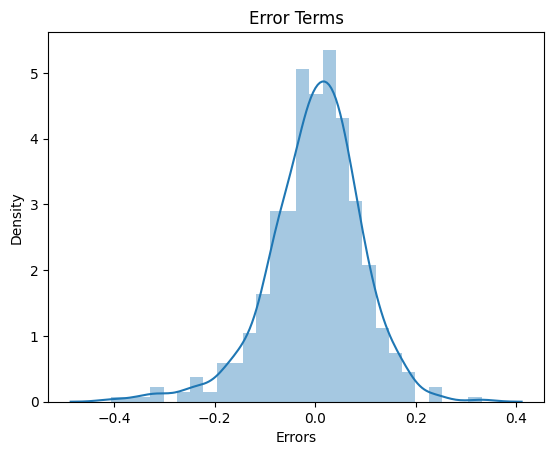

In [87]:
# plotting histogram of error terms
sns.distplot(y_df_train-y_df_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

- The graph above indicates that the error terms follow a normal distribution.

## Multicolinearity

In [88]:
vif(col7)

                Features   VIF
2                   temp  3.68
3              windspeed  3.05
0                     yr  2.00
4          season_summer  1.56
8       weathersit_Mist   1.48
5          season_winter  1.38
6              mnth_sept  1.20
7  weathersit_Light Snow  1.08
1                holiday  1.03


In [89]:
X_df_train[col7].corr()

,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_sept,weathersit_Light Snow,weathersit_Mist
yr,1.000000,-0.014980,0.107288,-0.001108,0.013856,-0.022638,0.002574,-0.060764,-0.015469
holiday,-0.014980,1.000000,-0.066282,0.017569,-0.063232,0.050712,0.043692,-0.028154,-0.038279
temp,0.107288,-0.066282,1.000000,-0.187396,0.125582,-0.233697,0.207457,-0.036093,-0.090161
windspeed,-0.001108,0.017569,-0.187396,1.000000,0.110089,-0.090649,-0.121734,0.086900,-0.030385
season_summer,0.013856,-0.063232,0.125582,0.110089,1.000000,-0.328116,-0.168473,-0.045231,0.039442
season_winter,-0.022638,0.050712,-0.233697,-0.090649,-0.328116,1.000000,-0.020175,0.114448,0.023127
mnth_sept,0.002574,0.043692,0.207457,-0.121734,-0.168473,-0.020175,1.000000,0.033894,0.044527
weathersit_Light Snow,-0.060764,-0.028154,-0.036093,0.086900,-0.045231,0.114448,0.033894,1.000000,-0.125817
weathersit_Mist,-0.015469,-0.038279,-0.090161,-0.030385,0.039442,0.023127,0.044527,-0.125817,1.000000


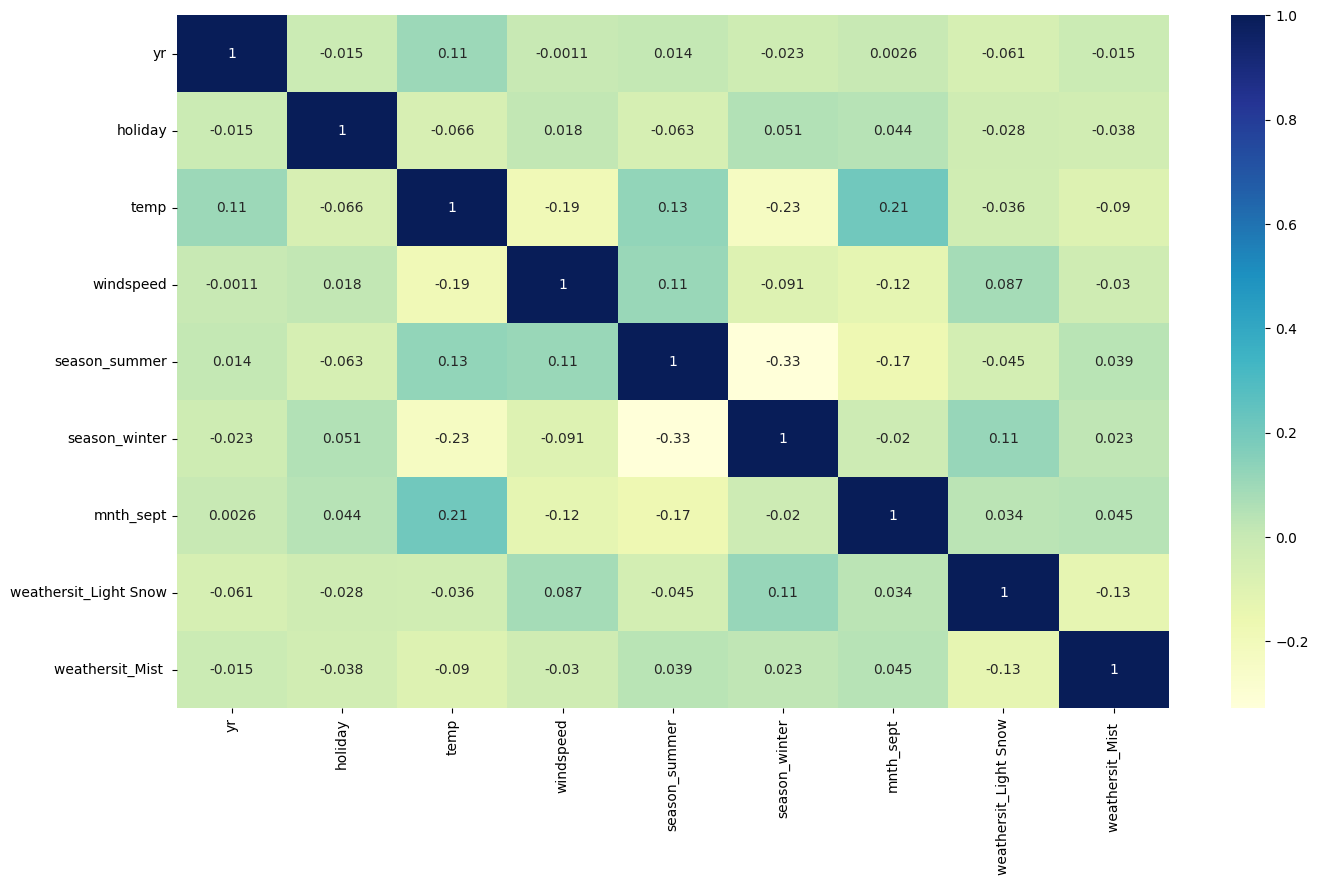

In [90]:
plt.figure(figsize= (16,9))
sns.heatmap(X_df_train[col7].corr(),cmap = 'YlGnBu',annot = True)
plt.show()

- VIF values are < 5 which means no multicolinearity

## Linearity

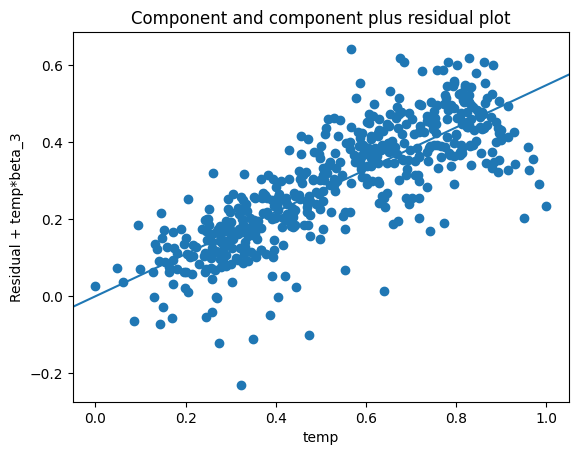

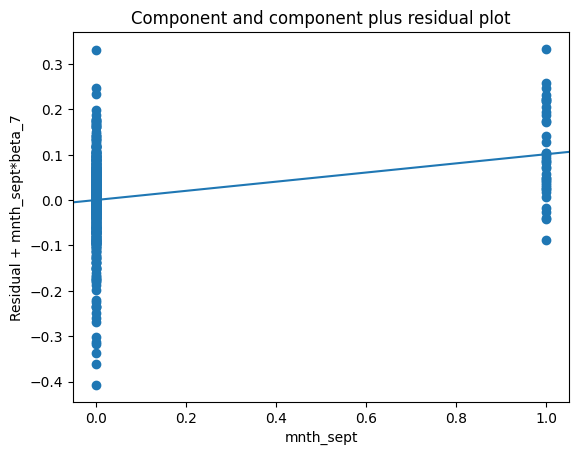

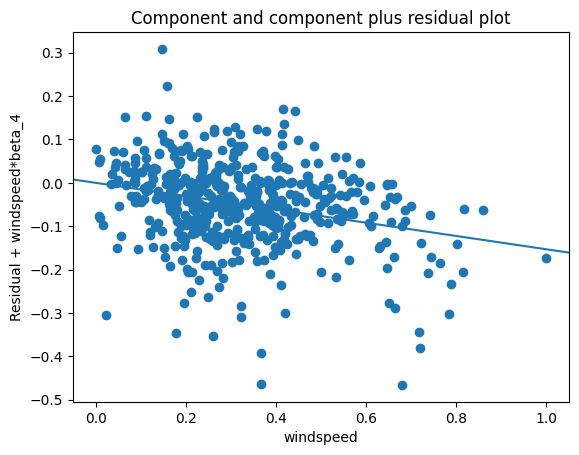

In [91]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
sm.graphics.plot_ccpr(lm_7, 'temp')
plt.show()

sm.graphics.plot_ccpr(lm_7, 'mnth_sept')
plt.show()

sm.graphics.plot_ccpr(lm_7, 'windspeed')
plt.show()

- Linearity is evident in the visualizations above.

## Homosecdesity

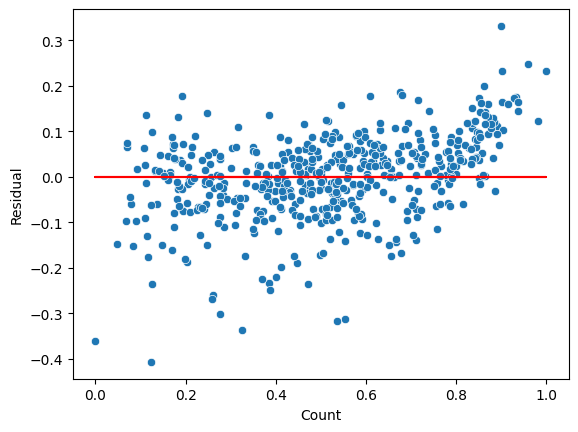

In [92]:
y_df_train_pred = lr.predict(X_df_train[col7])
residual = y_df_train - y_df_train_pred
sns.scatterplot(x= y_df_train,y= residual)
plt.plot(y_df_train,(y_df_train - y_df_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

- There's no clear pattern in the plot of residuals above.

## Independence of residuals

1. DW Value Close to 2: A value close to 2 suggests that there is no first-order autocorrelation in the residuals. This means that consecutive residuals are not significantly correlated with each other.

2. DW Value < 2: A value less than 2 indicates positive autocorrelation in the residuals. This suggests that consecutive residuals tend to have similar signs, indicating a pattern of dependence.

3. DW Value > 2: A value greater than 2 indicates negative autocorrelation in the residuals. This suggests that consecutive residuals tend to have opposite signs, again indicating a pattern of dependence.

-------
- In lm_7 the Durbin-Watson is 2.088 suggests that there is little to no autocorrelation present in the residuals of the final model.

## Actual vs Predicted

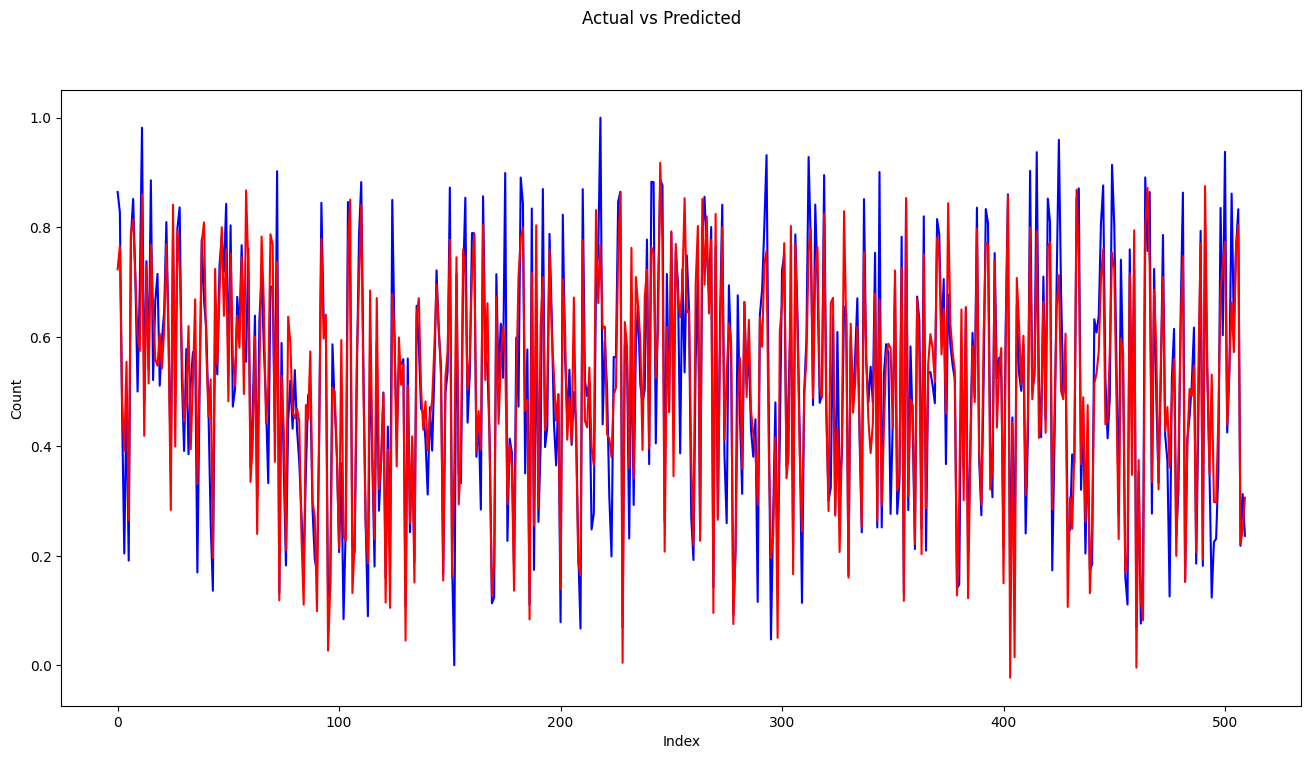

In [93]:
c = [i for i in range (X_df_train.shape[0])]
plt.figure(figsize=(16,8))
sns.lineplot(x=c, y=y_df_train, color="blue")
sns.lineplot(x=c, y=y_df_train_pred, color="red")
plt.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

In [110]:
# Calculating adjusted r square
adjusted_r2 = round(1-(1-r2)*(X_df_train.shape[0]-1)/(X_df_train.shape[0]-X_df_train.shape[1]-1),4)
print(adjusted_r2)

0.7939


## Model Predictions

### R-Squared for train Prediction

In [95]:
r2_score(y_df_train,y_df_train_pred)

0.8308378040041673

In [96]:
# applying scaling on test data
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_test[num_vars]= scalar.transform(df_test[num_vars])

In [97]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,1,0,0,0,0,0,0


In [98]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light Snow,weathersit_Mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
y_df_test = df_test.pop('cnt')
X_df_test = df_test

In [100]:
X_df_test = X_df_test[col7]

In [101]:
# add constant variable to test data set
X_df_test_lm7=sm.add_constant(X_df_test)

In [102]:
lr_7 = build_model_sk(X_df_test_lm7,y_df_test)
print(lr.intercept_,lr.coef_)

0.1264361009726921 [ 0.23278648 -0.09921116  0.54804559 -0.15327576  0.08684783  0.13057444
  0.10107589 -0.28383694 -0.07974725]


In [103]:
y_df_test_pred = lr_7.predict(X_df_test_lm7)

In [104]:
r2 =r2_score(y_df_test ,y_df_test_pred )

In [105]:
r2

0.8055976852330393

## Model Evaluation 

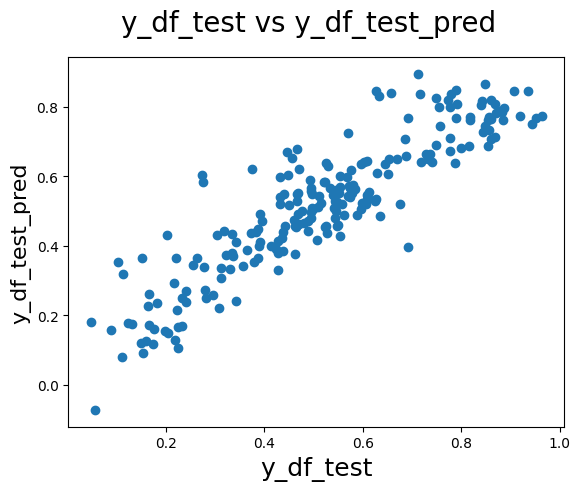

In [106]:
# Plotting y_df_test and y_df_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_df_test, y_df_test_pred)
fig.suptitle('y_df_test vs y_df_test_pred', fontsize = 20) 
plt.xlabel('y_df_test', fontsize = 18)
plt.ylabel('y_df_test_pred', fontsize = 16) 
plt.show()

In [107]:
round(lm_7.params,4)

const                    0.1264
yr                       0.2328
holiday                 -0.0992
temp                     0.5480
windspeed               -0.1533
season_summer            0.0868
season_winter            0.1306
mnth_sept                0.1011
weathersit_Light Snow   -0.2838
weathersit_Mist         -0.0797
dtype: float64

We can see that the equation of our best fitted line is:

values are from coef

$ cnt = 0.1264 +  0.2328 \times  yr - 0.0992  \times  holiday + 0.5480 \times temp - 0.1533 \times windspeed + 0.0868 \times season_summer + 0.1306 \times season_winter + 0.1011 \times mnth_sept  - 0.2838 \times weathersit_Light Snow - 0.0797 \times weathersit_Mist $


In [108]:
# Calculating adjusted r square
adjusted_r2 = round(1-(1-r2)*(X_df_test.shape[0]-1)/(X_df_test.shape[0]-X_df_test.shape[1]-1),4)
print(adjusted_r2)

0.7972


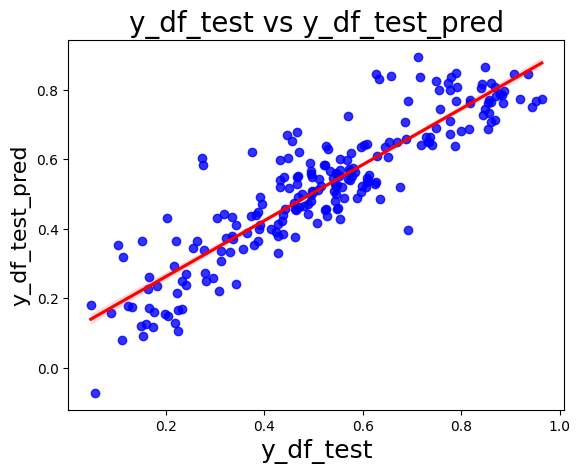

In [109]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_df_test, y=y_df_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_df_test vs y_df_test_pred', fontsize=20)
plt.xlabel('y_df_test', fontsize=18)
plt.ylabel('y_df_test_pred', fontsize=16)
plt.show()

## Comparison between Train and Test data set

- Train dataset R-Squared           : 0.831
- Test dataset R-Squared            : 0.8055
- Train dataset Adjusted R-Squared  : 0.7939    
- Test dataset Adjusted R-Squared   : 0.7972


--------

 The demand for bikes is influenced by factors such as the year, holiday status, temperature, windspeed, September month, weather conditions (light snow/rain, misty), and the seasons of summer and winter.